In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd 
    
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200



import diagram as dg
import intro_plots as ip
import colorhelp as ch

spath = Path("../deck/figures")

In [4]:
df = pd.read_csv("2645453.csv")

In [5]:
df['NAME'].unique()

array(['HILO INTERNATIONAL AIRPORT 87, HI US',
       'JFK INTERNATIONAL AIRPORT, NY US', 'BARROW AIRPORT, AK US'],
      dtype=object)

In [6]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT06', 'WT08', 'WT09'],
      dtype='object')

In [7]:
#df['NAME'].str[:
df['station'] = df['NAME'].str.rsplit('AIRPORT').str[0] + "AIRPORT"

In [47]:
df[['station', 'TAVG', 'PRCP', 'DATE']][df['station'].str.contains('JFK')]

,station,TAVG,PRCP,DATE
190,JFK INTERNATIONAL AIRPORT,2.2,16.0,2021-01-01
191,JFK INTERNATIONAL AIRPORT,5.8,1.8,2021-01-02
192,JFK INTERNATIONAL AIRPORT,3.0,3.0,2021-01-03
193,JFK INTERNATIONAL AIRPORT,3.6,0.3,2021-01-04
194,JFK INTERNATIONAL AIRPORT,3.8,0.0,2021-01-05
...,...,...,...,...
375,JFK INTERNATIONAL AIRPORT,22.6,0.0,2021-07-05
376,JFK INTERNATIONAL AIRPORT,25.3,9.9,2021-07-06
377,JFK INTERNATIONAL AIRPORT,25.4,0.0,2021-07-07
378,JFK INTERNATIONAL AIRPORT,25.1,8.1,2021-07-08


In [49]:
points =  df[['station', 'TAVG', 'PRCP', 'DATE']][df['DATE'].str.contains('2021-07-06')]

In [50]:
points

,station,TAVG,PRCP,DATE
186,HILO INTERNATIONAL AIRPORT,24.3,4.8,2021-07-06
376,JFK INTERNATIONAL AIRPORT,25.3,9.9,2021-07-06
566,BARROW AIRPORT,5.6,0.5,2021-07-06


In [64]:
df[df['station'].str.contains('BARROW')].sort_values(by='PRCP', ascending=False).head()['DATE']

558    2021-06-28
432    2021-02-22
557    2021-06-27
415    2021-02-05
428    2021-02-18
Name: DATE, dtype: object

In [65]:
df[df['station'].str.contains('JFK')].sort_values(by='PRCP', ascending=False).head()['DATE']

221    2021-02-01
373    2021-07-03
337    2021-05-28
339    2021-05-30
205    2021-01-16
Name: DATE, dtype: object

In [75]:
for d in df['DATE']:
    r = df[df['DATE'].str.match(d)][['NAME', 'TAVG','PRCP']]
    if (r['TAVG']>0).all() and (r['PRCP']>0).all():
        print(d, r)

2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIRPORT 87, HI US  24.7   3.8
373      JFK INTERNATIONAL AIRPORT, NY US  17.7  27.9
563                 BARROW AIRPORT, AK US   1.1   1.3
2021-07-06                                      NAME  TAVG  PRCP
186  HILO INTERNATIONAL AIRPORT 87, HI US  24.3   4.8
376      JFK INTERNATIONAL AIRPORT, NY US  25.3   9.9
566                 BARROW AIRPORT, AK US   5.6   0.5
2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIRPORT 87, HI US  24.7   3.8
373      JFK INTERNATIONAL AIRPORT, NY US  17.7  27.9
563                 BARROW AIRPORT, AK US   1.1   1.3
2021-07-06                                      NAME  TAVG  PRCP
186  HILO INTERNATIONAL AIRPORT 87, HI US  24.3   4.8
376      JFK INTERNATIONAL AIRPORT, NY US  25.3   9.9
566                 BARROW AIRPORT, AK US   5.6   0.5
2021-07-03                                      NAME  TAVG  PRCP
183  HILO INTERNATIONAL AIR

In [79]:
points = df[['DATE', 'TAVG', 'PRCP', 'station']][df['DATE']=='2021-07-03']

In [117]:
data = []
for _, row in points.iterrows():
    data.append([('temp', row['TAVG']), ('prcp', row['PRCP']), 
                 ('station', row['station'])])
    
data

[[('temp', 24.7), ('prcp', 3.8), ('station', 'HILO INTERNATIONAL AIRPORT')],
 [('temp', 17.7), ('prcp', 27.9), ('station', 'JFK INTERNATIONAL AIRPORT')],
 [('temp', 1.1), ('prcp', 1.3), ('station', 'BARROW AIRPORT')]]

In [166]:
x = np.array(data).T[1][0].astype(float)
y = np.array(data).T[1][1].astype(float)
c = np.array(data).T[1][2]


In [167]:
yboxes = [0 + .25/2]
for i in range(2):
    yboxes.append(yboxes[i]+1.5*.25)


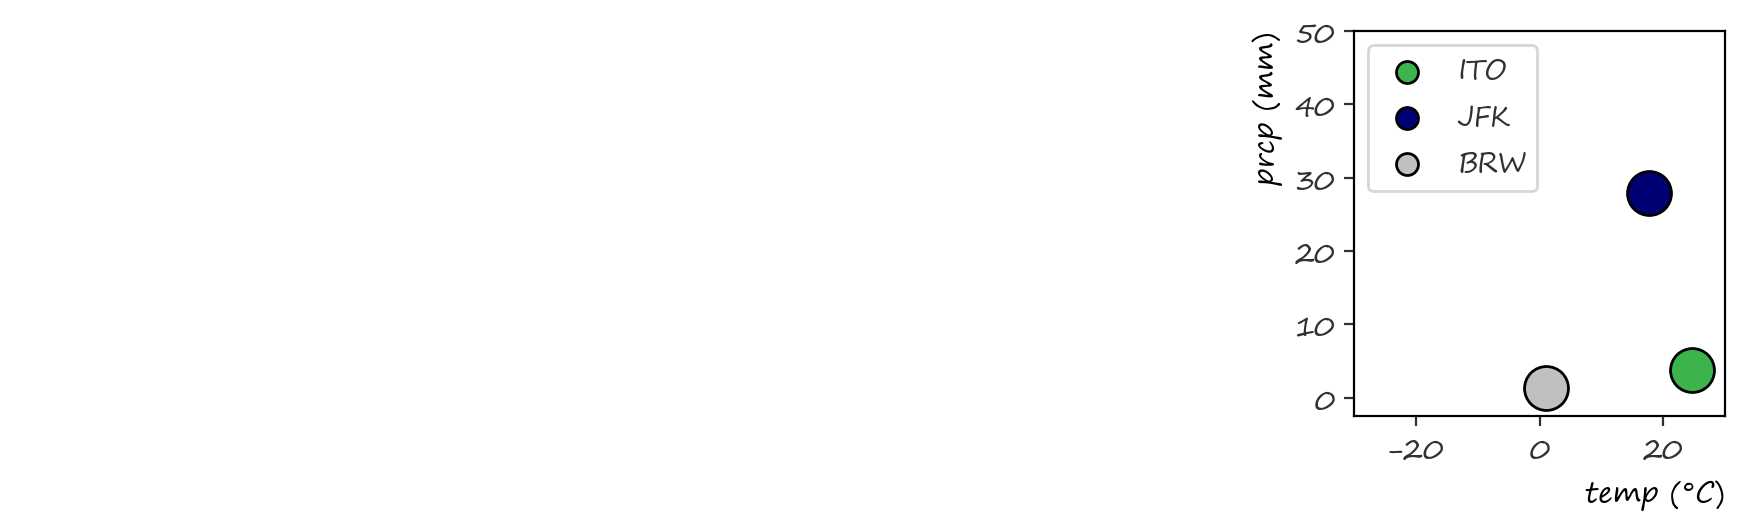

In [168]:
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', 
                          label=None)
fig.savefig(spath/"intro01.png", facecolor='white', bbox_inches='tight')
plt.show()

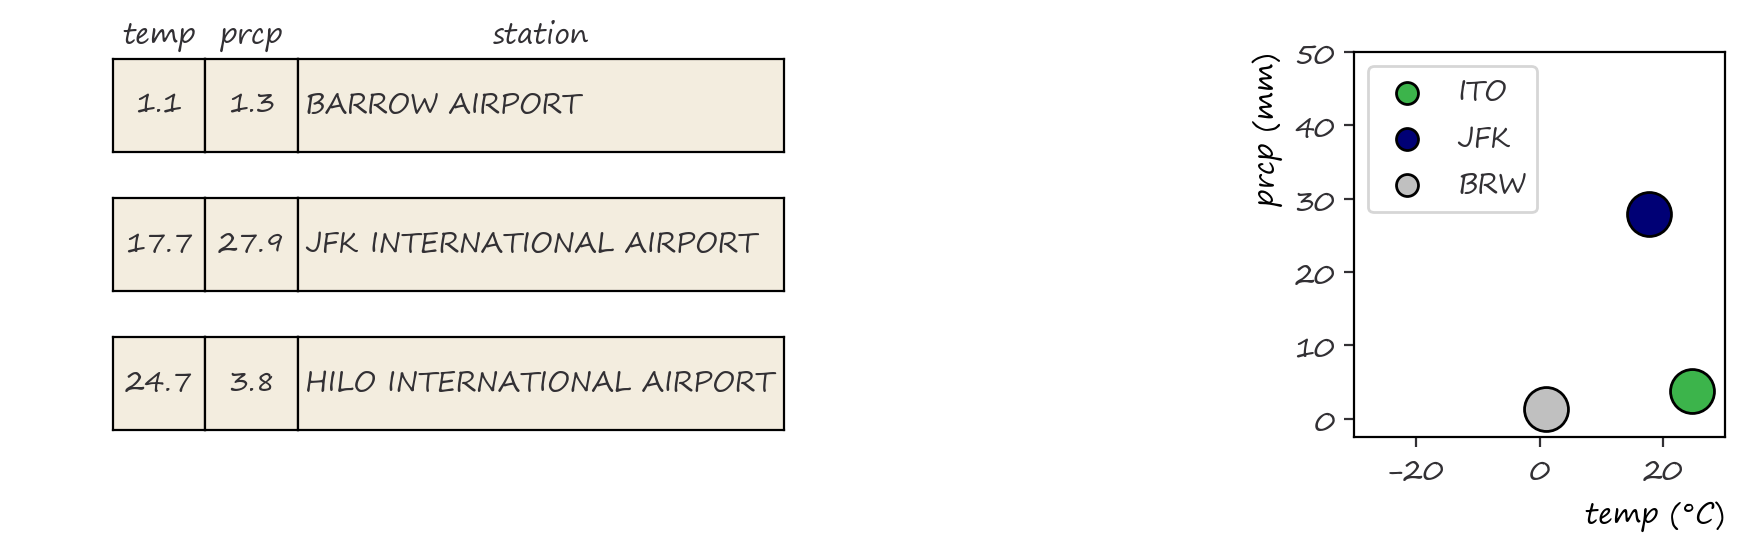

In [169]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
dg.table(axd, data)

fig.savefig(spath/"intro02a.png", facecolor='white', bbox_inches='tight')


plt.show()

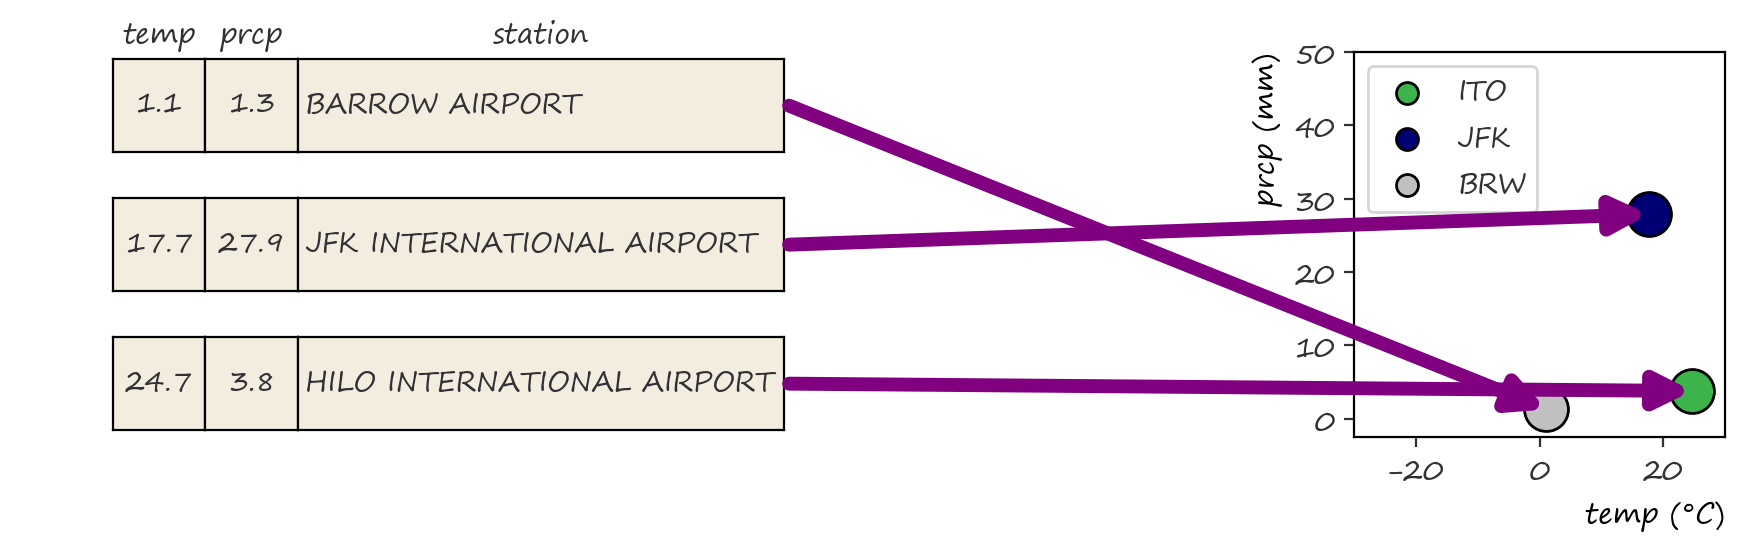

In [176]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
dg.table(axd, data)

for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyA=(2.075, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)

fig.savefig(spath/"intro02b.png", facecolor='white', bbox_inches='tight')


plt.show()

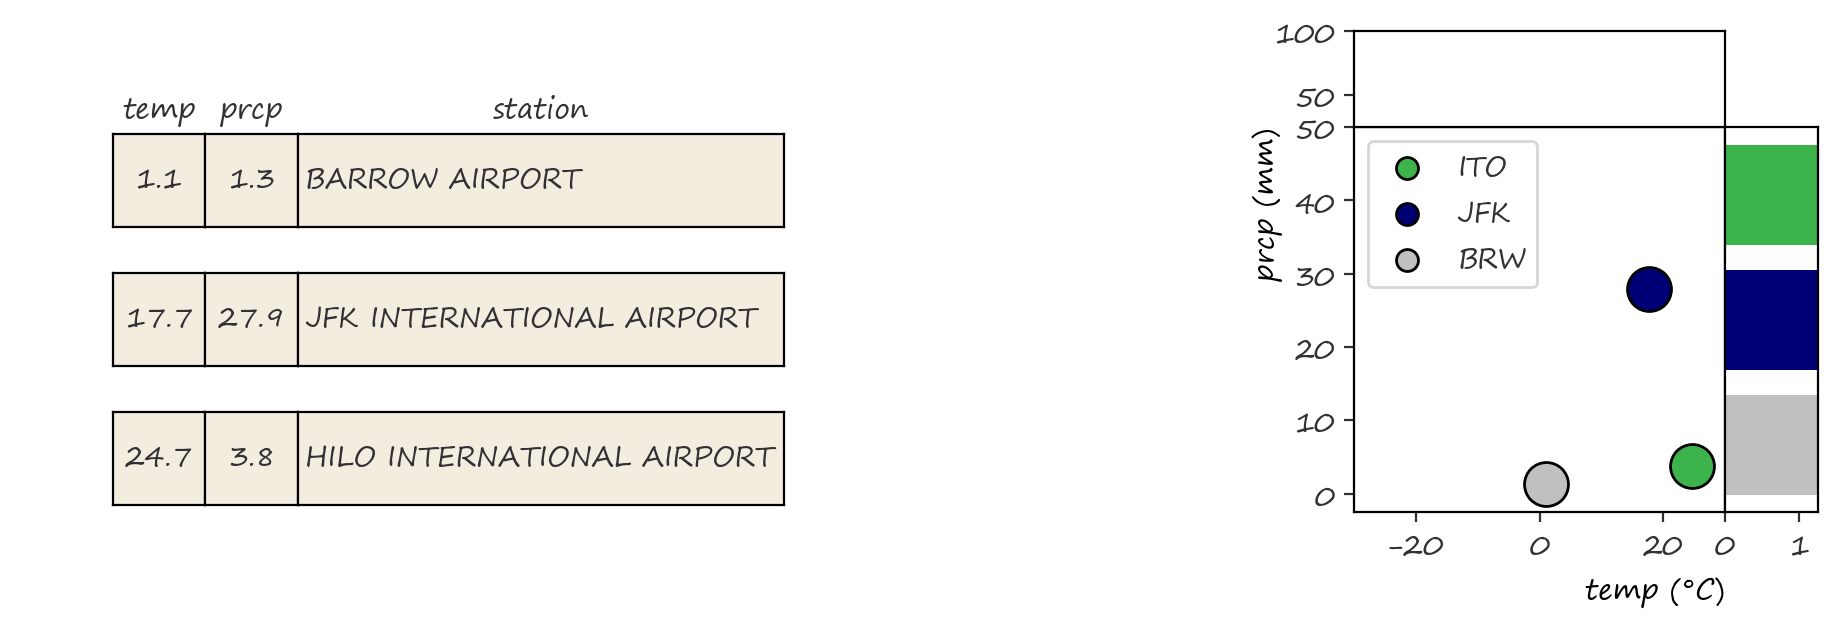

In [182]:
#add forwards arrows + hist
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
axbx = axd['H'].inset_axes([0,1,1,.25], 
                           transform=axd['H'].transAxes, facecolor='white')
axby = axd['H'].inset_axes([1,0,.25,1], 
                           transform=axd['H'].transAxes, facecolor='white')
axbx.bar([0,1, 2], x, color=[ip.cdict[ci] for ci in c])
axby.barh([0,1, 2], y[::-1], color=[ip.cdict[ci] for ci in c][::-1])
axbx.set(xticks=[], ylim=(25, 100))
axby.set(yticks=[], xlim=(0, 1.25))
 
    
dg.table(axd, data)
fig.savefig(spath/"intro03.png", facecolor='white', bbox_inches='tight')


plt.show()

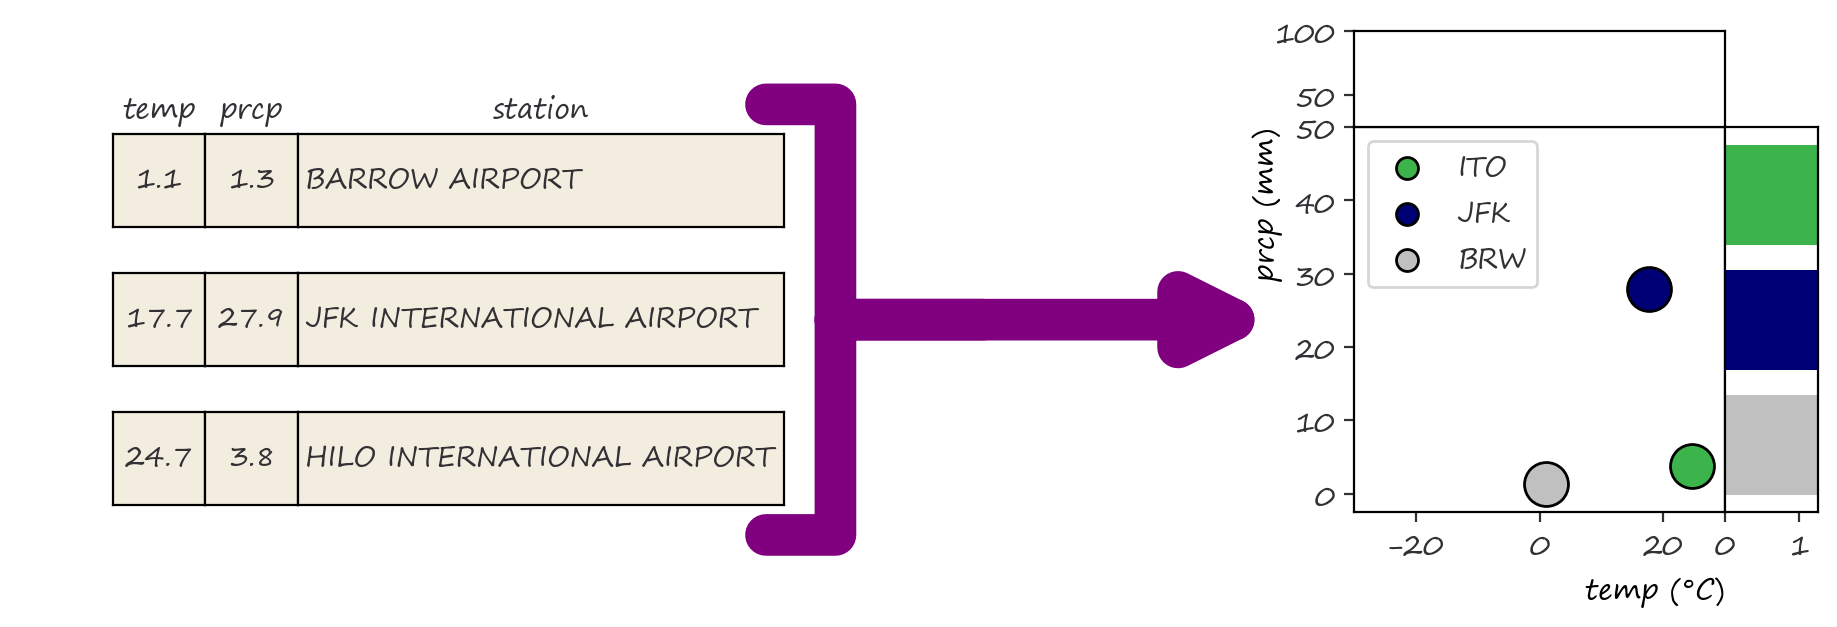

In [191]:
#add forwards arrows + hist
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
axbx = axd['H'].inset_axes([0,1,1,.25], 
                           transform=axd['H'].transAxes, facecolor='white')
axby = axd['H'].inset_axes([1,0,.25,1], 
                           transform=axd['H'].transAxes, facecolor='white')
axbx.bar([0,1, 2], x, color=[ip.cdict[ci] for ci in c])
axby.barh([0,1, 2], y[::-1], color=[ip.cdict[ci] for ci in c][::-1])
axbx.set(xticks=[], ylim=(25, 100))
axby.set(yticks=[], xlim=(0, 1.25))
 
    
dg.table(axd, data)

darrow1 = mpatches.ConnectionPatch(xyA=(2.2, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-.2, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle='-|>', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow1)
darrow2 = mpatches.ConnectionPatch(xyA=(2.2, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-1, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle=']-,widthA=1.55,lengthA=.5', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow2)

fig.savefig(spath/"intro03d.png", facecolor='white', bbox_inches='tight')


plt.show()

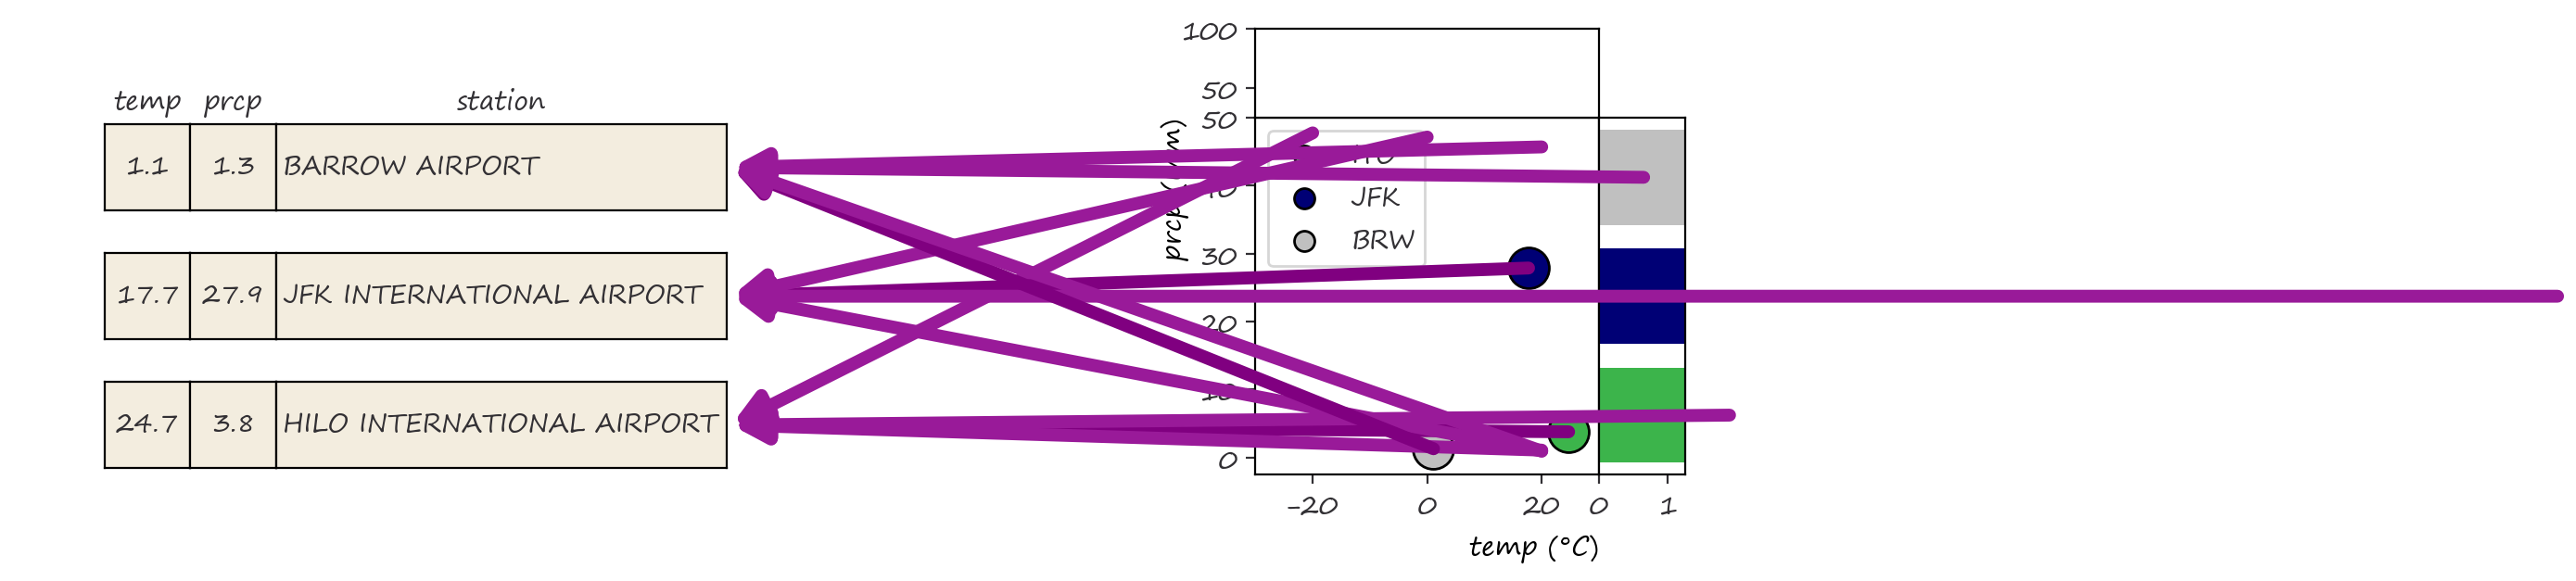

In [212]:
lgloc = [(20, 1.1), (20, .97), (20, .95)]
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=data, 
                          plot_type='scatter', label=None)
axbx = axd['H'].inset_axes([0,1,1,.25], 
                           transform=axd['H'].transAxes, facecolor='white')
axby = axd['H'].inset_axes([1,0,.25,1], 
                           transform=axd['H'].transAxes, facecolor='white')



axbx.set(xticks=[], xlim=(-.5, 2.5), ylim=(25, 100))
axby.set(yticks=[], ylim=(-.5, 2.5), xlim=(0, 1.25))


dg.table(axd, data)
larrow = '#991A99'
linestyle = ['-', '-', '-']

for i, (yt, xi, yi, ci) in enumerate(zip(yboxes,x, y, c)):
    axbx.bar(i, xi, facecolor= ip.cdict[ci])
    axby.barh(i, yi, facecolor=ip.cdict[ci])
    darrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor, linestyle=linestyle[i])
    fig.add_artist(darrow)
    xbarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(i, xi/2), coordsA=axbx.transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=larrow, linestyle=linestyle[i])
    fig.add_artist(xbarrow)
    ybarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(yi/2, i), coordsA=axby.transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=larrow, linestyle=linestyle[i])
    fig.add_artist(ybarrow)
    
    lgarrow = mpatches.ConnectionPatch(xyB=(2.075, yt), coordsB=axd['E'].transAxes, 
                                      xyA=lgloc[i], coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=larrow, linestyle=linestyle[i])
    fig.add_artist(lgarrow)

fig.savefig(spath/f"intro03c.png", facecolor='white', bbox_inches='tight')
plt.show()

In [204]:
lgloc

[(70, 1.1), (70, 0.97)]

In [196]:
lgloc = [(70, 1.1), (70, .97)]
for i, (yt, xi, yi, ci) in enumerate(zip(yboxes,x, y, c)):
    fig, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=data, 
                              plot_type='scatter', label=None)
    axbx = axd['H'].inset_axes([0,1,1,.25], 
                               transform=axd['H'].transAxes, facecolor='white')
    axby = axd['H'].inset_axes([1,0,.25,1], 
                               transform=axd['H'].transAxes, facecolor='white')
    
    axbx.bar(i, xi, facecolor= dg.station_color[ci])
    axby.barh(i, yi, facecolor=dg.station_color[ci])
    
    axbx.set(xticks=[], xlim=(-.5, 1.5), ylim=(25, 100))
    axby.set(yticks=[], ylim=(-.5, 1.5), xlim=(0, 1.25))


    dg.table(axd, data)
    larrow = '#991A99'

    darrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
    xbarrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(i, xi/2), coordsA=axbx.transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=larrow)
    fig.add_artist(xbarrow)
    ybarrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(yi/2, i), coordsA=axby.transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=larrow)
    fig.add_artist(ybarrow)
    
    lgarrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=lgloc[i], coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=larrow)
    fig.add_artist(lgarrow)

 
    fig.savefig(spath/f"intro03{['b','a'][i-1]}.png", facecolor='white', bbox_inches='tight')
    plt.show()

KeyError: 'HILO INTERNATIONAL AIRPORT'

In [ ]:
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)


darrow1 = mpatches.ConnectionPatch(xyA=(1.5, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-.2, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle='-|>', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow1)
darrow2 = mpatches.ConnectionPatch(xyA=(1.1, .5), coordsA=axd['E'].transAxes, 
                                  xyB=(-1, .5), coordsB=axd['H'].transAxes, 
                                  mutation_scale=50, arrowstyle=']-,widthA=1.55,lengthA=.5', 
                                 lw=15, color=dg.acolor)
fig.add_artist(darrow2)


fig.savefig(spath/"intro03d.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#add backwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyB=(.95, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi-10, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=10, color=dg.acolor)
    fig.add_artist(darrow)
    
fig.savefig(spath/"intro04.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#add backwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo[::-1])
for (yt, xi, yi) in zip(yboxes,x[::-1],y[::-1]):
    darrow = mpatches.ConnectionPatch(xyB=(.95, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi-10, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=10, color=dg.acolor)
    fig.add_artist(darrow)
    
fig.savefig(spath/"intro04b.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
N = 50
xv = np.linspace(x[0], x[1], N)
yv = np.linspace(y[0], y[1], N)
cv = np.linspace(0, 1, N)
points = np.array([xv, yv]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ch.get_continuous_cmap([dg.station_color[c[1]], dg.station_color[c[0]]])
norm = mcolors.BoundaryNorm(cv, cmap.N)

In [ ]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
fig.savefig(spath/"intro05.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
fig.savefig(spath/"intro05a.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyB=(1, yt), coordsB=axd['E'].transAxes, 
                                      xyA=(xi, yi), coordsA=axd['H'].transData, 
                                      mutation_scale=50, arrowstyle='-|>', 
                                     lw=5, color=dg.acolor)
    fig.add_artist(darrow)
    

step = 7

ym = .475
marrow = mpatches.ConnectionPatch(xyB=(1, ym), coordsB=axd['E'].transAxes, 
                                  xyA=(xv[int(len(xv)/2)], yv[int(len(yv)/2)]),
                                  coordsA=axd['H'].transData, 
                                  mutation_scale=25, arrowstyle='-|>', 
                                 lw=.5, linestyle='--', color=dg.acolor)
fig.add_artist(marrow)
    
w = h = .25
yb = ym - w/2   
xb =.25 
for i in range(3):
    axsub = axd['E'].inset_axes([xb,yb,w,h], 
                                transform=axd['E'].transData)
    axsub.patch.set_alpha(.5)
    axsub.set(xticks=[], yticks=[])
    axsub.text(.5, .5, '?', 
                transform=axsub.transAxes, 
               ha='center', va='center', fontsize=18)
    xb+=w
    
    
fig.savefig(spath/"intro05b.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
#add forwards arrows
#add forwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)

for (yt, xi, yi) in zip(yboxes,x,y):
    darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd['E'].transAxes, 
                                      xyB=(xi, yi), coordsB=axd['H'].transData, 
                                      mutation_scale=25, arrowstyle='-|>', 
                                     lw=10, color=dg.acolor)
    fig.add_artist(darrow)

fig.savefig(spath/"intro06.png", facecolor='white', bbox_inches='tight')

plt.show()

In [ ]:
shift = 25
dthree = []
for row in dtwo:
    d = dict(row)
    d['temp'] = d['temp']+ shift
    dthree.append(list(d.items()))
dthree

In [ ]:
#add equivariance arrows
for s in [0,1,2]:
    fig = plt.figure(facecolor='white', figsize=(11,5))
    fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

    fig0, axd = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dtwo, 
                              plot_type='scatter', fig=fig0, label=None)
    dg.table(axd, dtwo)

    for (yt, xi, yi) in zip(yboxes,x,y):
        darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd['E'].transAxes, 
                                          xyB=(xi, yi), coordsB=axd['H'].transData, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=10, color=dg.acolor)
        fig0.add_artist(darrow)

    fig1, axd1 = dg.make_figure(artist=False, section=False,
                              visual=False, continuity=False, 
                              data=False, values=dthree, 
                              plot_type='scatter', fig=fig1, label=None)
    if s==0:
        axd1['H'].set_visible(False)
    
    dg.table(axd1, dthree)

    xx = .25 + .25/2
    tarrow = mpatches.ConnectionPatch(xyA=(xx, 0.05), coordsA=axd['E'].transAxes, 
                                          xyB=(xx, .95), coordsB=axd1['E'].transAxes, 
                                          mutation_scale=25, arrowstyle='-|>', 
                                         lw=10, color=dg.ecolor)
    fig1.add_artist(tarrow)

    fig1.text(xx+.1, 1.1, f'+ {shift}°F', transform=axd1['E'].transAxes, 
              va='center', ha='left', color=dg.ecolor, fontsize=20)
    
    if s>0:
        for (yt, xi, yi) in zip(yboxes,x+shift,y):
            darrow = mpatches.ConnectionPatch(xyA=(1.08, yt), coordsA=axd1['E'].transAxes, 
                                              xyB=(xi, yi), coordsB=axd1['H'].transData, 
                                              mutation_scale=25, arrowstyle='-|>', 
                                             lw=10, color=dg.acolor)
            fig1.add_artist(darrow)

    if s>1:
        for (xi, yi) in zip(x, y):
            tvarrow = mpatches.ConnectionPatch(xyA=(xi, yi-.125), coordsA=axd['H'].transData, 
                                              xyB=(xi+shift, yi+.02), coordsB=axd1['H'].transData, 
                                              mutation_scale=25, arrowstyle='-|>', 
                                             lw=10, color=dg.ecolor)
            fig1.add_artist(tvarrow)
    
        fig1.text(3.95, 1.1, f'+ {shift}', transform=axd1['E'].transAxes, 
              va='center', ha='right', color=dg.ecolor, fontsize=20)

   

    fig.savefig(spath/f"intro06{['a','b', 'c'][s]}.png", facecolor='white', bbox_inches='tight')


plt.show()

In [ ]:
done = [dtwo[0]]

In [ ]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=False, 
                          data=True, values=dtwo, label=None)
fig.savefig(spath/"math01.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True,
                          visual=False, continuity=False, 
                          data=True, values=dtwo, 
                          fiber=True, label=['E', 'H'])
fig.savefig(spath/"math02.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=False, continuity=True,
                          data=True, values=done, 
                          label=['E', 'H'])
fig.savefig(spath/"math03.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=True, continuity=True, 
                          data=done, values=done,
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math04.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True,
                          visual=True, continuity=True, 
                          data=True, values=done, 
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math05.png", facecolor='white', bbox_inches='tight')
plt.show()

In [ ]:
fig, axd = dg.make_figure(artist=True, section=True, 
                          visual=True, continuity=True, 
                          data=True, values=done,
                          label=['E', 'V', 'V*', 'H'])
fig.savefig(spath/"math06.png", facecolor='white', bbox_inches='tight')
plt.show()